In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn import  preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="muted")
%matplotlib inline

In [2]:
train_path = '../base/train.csv'

In [3]:
df_train = pd.read_csv(train_path)

In [4]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train_drop = df_train.drop(['PassengerId'], axis=1)

In [6]:
df_train_drop.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train_drop['Survived'].unique()

array([0, 1])

In [8]:
label = df_train_drop['Survived']

In [9]:
df_train_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [10]:
len(df_train_drop[df_train_drop['Age'].isnull()])

177

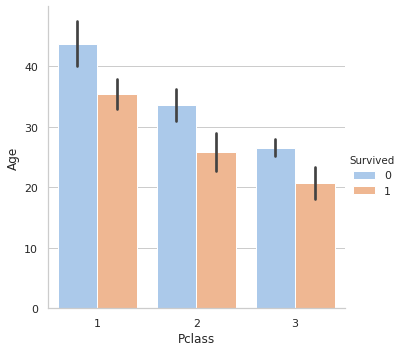

In [11]:
g = sns.catplot("Pclass", "Age", "Survived", data=df_train_drop, kind="bar", palette="pastel")
plt.show()

In [12]:
df_train_age_not_null = df_train_drop[df_train_drop['Age'].isnull()==False]
df_train_age_null = df_train_drop[df_train_drop['Age'].isnull()]

In [13]:
df_train_age_not_null.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_train_age_null.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [15]:
df_train_age_not_null['Pclass'].unique()

array([3, 1, 2])

In [16]:
pclass_age = {}
for pclass in df_train_age_not_null['Pclass'].unique():
    df_aux_not_null = df_train_age_not_null[df_train_age_not_null['Pclass']==pclass]
    media = float(np.mean(df_aux_not_null['Age']))
    pclass_age.update({pclass:media})

In [17]:
pclass_age

{3: 25.14061971830986, 1: 38.233440860215055, 2: 29.87763005780347}

In [18]:
df_train_age_null.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [19]:
df_train_age_null.loc[::,'Age'] = df_train_age_null['Pclass'].apply(lambda x : int(pclass_age[x]))

/home/zeus/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
df_train_age_null.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,25,0,0,330877,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,29,0,0,244373,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,25,0,0,2649,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,25,0,0,2631,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25,0,0,330959,7.8792,NaN,Q


In [21]:
df_concat = pd.concat([df_train_age_null,df_train_age_not_null])
df_concat = df_concat.sort_index(axis = 0) 
df_concat.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
len(df_concat)

891

In [23]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [24]:
df_concat = df_concat.drop(['Cabin'], axis=1)

In [25]:
df_concat['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
df_concat['Embarked'] = df_concat['Embarked'].fillna('S')

In [27]:
df_concat.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [29]:
df_concat.Sex =  df_concat.Sex.apply(lambda x : 1 if x =='male' else 2)

In [30]:
df_concat.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [31]:
encoder_embarked = preprocessing.LabelEncoder()
Embarked = encoder_embarked.fit_transform(df_concat['Embarked'])
encoder_embarked.classes_

array(['C', 'Q', 'S'], dtype=object)

In [32]:
df_concat['Embarked'] = Embarked

In [33]:
df_concat.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [34]:
def get_title(x):
    for palavra in x.split():
        if '.' in palavra:
            return palavra

df_concat['Title'] = df_concat['Name'].apply(get_title)

In [35]:
df_concat['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [36]:
vc = df_concat['Title'].value_counts()
vc

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Lady.          1
Don.           1
Sir.           1
Ms.            1
Countess.      1
Mme.           1
Jonkheer.      1
Capt.          1
Name: Title, dtype: int64

In [37]:
rares = vc[vc<39].index

In [38]:
rares

Index(['Dr.', 'Rev.', 'Col.', 'Mlle.', 'Major.', 'Lady.', 'Don.', 'Sir.',
       'Ms.', 'Countess.', 'Mme.', 'Jonkheer.', 'Capt.'],
      dtype='object')

In [39]:
df_concat.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,0,Mrs.
2,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,2,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,2,Mrs.
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,Mr.


In [40]:
df_concat['Title']= df_concat['Title'].apply(lambda x : 'rare' if x in rares else x )

In [41]:
df_concat['Title'].value_counts()

Mr.        517
Miss.      182
Mrs.       125
Master.     40
rare        27
Name: Title, dtype: int64

In [42]:
encoder_title = preprocessing.LabelEncoder()
Title = encoder_title.fit_transform(df_concat['Title'])
encoder_title.classes_

array(['Master.', 'Miss.', 'Mr.', 'Mrs.', 'rare'], dtype=object)

In [43]:
df_concat['Title'] = Title

In [44]:
df_concat.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,0,3
2,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,2,3
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,2


In [45]:
df_concat['FareBand'] = pd.qcut(df_concat['Fare'], 4)
df_concat['ageBand'] = pd.qcut(df_concat['Age'], 4)

In [46]:
df_concat['FareBand'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: FareBand, dtype: int64

In [47]:
df_concat['ageBand'].value_counts()

(0.419, 22.0]    231
(22.0, 26.0]     224
(37.0, 80.0]     218
(26.0, 37.0]     218
Name: ageBand, dtype: int64

In [48]:
encoder_FareBand = preprocessing.LabelEncoder()
FareBand = encoder_FareBand.fit_transform(df_concat['FareBand'])
encoder_FareBand.classes_

array([Interval(-0.001, 7.91, closed='right'),
       Interval(7.91, 14.454, closed='right'),
       Interval(14.454, 31.0, closed='right'),
       Interval(31.0, 512.329, closed='right')], dtype=object)

In [49]:
encoder_ageBand = preprocessing.LabelEncoder()
ageBand = encoder_ageBand.fit_transform(df_concat['ageBand'])
encoder_ageBand.classes_

array([Interval(0.419, 22.0, closed='right'),
       Interval(22.0, 26.0, closed='right'),
       Interval(26.0, 37.0, closed='right'),
       Interval(37.0, 80.0, closed='right')], dtype=object)

In [50]:
df_concat['FareBand'] = FareBand
df_concat['ageBand'] = ageBand

In [51]:
df_concat.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FareBand,ageBand
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,0,3,3,3
2,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,2,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,2,3,3,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,2,1,2


In [52]:
df_concat['isAlone'] = df_concat['SibSp'] + df_concat['Parch']
df_concat['isAlone'] = df_concat['isAlone'] == 0

In [53]:
df_concat.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FareBand,ageBand,isAlone
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2,0,0,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,0,3,3,3,False
2,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,2,1,1,1,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,2,3,3,2,False
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,2,1,2,True


In [54]:
df_concat['isAlone'] = df_concat['isAlone'].apply(lambda x: 1 if x else 0)
df_concat.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FareBand,ageBand,isAlone
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,0,3,3,3,0
2,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,2,1,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,2,3,3,2,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,2,1,2,1


In [55]:
corr = df_concat.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBand,ageBand,isAlone
Survived,1.000000,-0.338481,0.543351,-0.050118,-0.035322,0.081629,0.257307,-0.167675,-0.052471,0.299357,0.005426,-0.203367
Pclass,-0.338481,1.000000,-0.131900,-0.403923,0.083081,0.018443,-0.549500,0.162098,-0.195910,-0.634271,-0.424719,0.135207
Sex,0.543351,-0.131900,1.000000,-0.079949,0.114631,0.245489,0.182333,-0.108262,-0.040484,0.243613,-0.054625,-0.303646
Age,-0.050118,-0.403923,-0.079949,1.000000,-0.243110,-0.174824,0.121503,-0.015899,0.477717,0.123686,0.883266,0.169577
SibSp,-0.035322,0.083081,0.114631,-0.243110,1.000000,0.414838,0.159651,0.068230,-0.213887,0.393025,-0.195476,-0.584471
Parch,0.081629,0.018443,0.245489,-0.174824,0.414838,1.000000,0.216225,0.039798,-0.122792,0.393881,-0.108612,-0.583398
Fare,0.257307,-0.549500,0.182333,0.121503,0.159651,0.216225,1.000000,-0.224719,-0.009068,0.579345,0.131220,-0.271832
Embarked,-0.167675,0.162098,-0.108262,-0.015899,0.068230,0.039798,-0.224719,1.000000,-0.011509,-0.098593,-0.011299,0.063532
Title,-0.052471,-0.195910,-0.040484,0.477717,-0.213887,-0.122792,-0.009068,-0.011509,1.000000,0.045648,0.434555,0.028812
FareBand,0.299357,-0.634271,0.243613,0.123686,0.393025,0.393881,0.579345,-0.098593,0.045648,1.000000,0.183336,-0.560279


In [56]:
df_train = df_concat.drop(['Name','Ticket','Survived'], axis=1)
y = df_concat['Survived']
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBand,ageBand,isAlone
0,3,1,22.0,1,0,7.2500,2,2,0,0,0
1,1,2,38.0,1,0,71.2833,0,3,3,3,0
2,3,2,26.0,0,0,7.9250,2,1,1,1,1
3,1,2,35.0,1,0,53.1000,2,3,3,2,0
4,3,1,35.0,0,0,8.0500,2,2,1,2,1


In [57]:
clf = LogisticRegression(solver='liblinear',C=0.35)
np.mean(cross_val_score(clf, df_train, y, cv=10,scoring='balanced_accuracy'))

0.789889794301559

In [58]:
clf = LogisticRegression(solver='liblinear')
np.mean(cross_val_score(clf, df_train, y, cv=10,scoring='balanced_accuracy'))

0.7847828424299014

In [59]:
clf = LogisticRegression(solver='liblinear')
clf.fit(df_train,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':np.arange(0.1,2,0.05)}
lr = LogisticRegression(solver='liblinear')
clf = GridSearchCV(lr, parameters, cv=10,scoring='balanced_accuracy')
clf.fit(df_train,label)
clf.best_score_,clf.best_params_

(0.7898416315363563, {'C': 0.25000000000000006})